In [154]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import kurtosis
from pandas.api.types import CategoricalDtype
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.preprocessing import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.width', 1000)  # Set the maximum width of the display
pd.set_option('display.max_columns', None)  # Display all columns without truncation


In [155]:
'''statements to add csv files, remove duplicates etc. Just Red and white individually
'''
#White wine
white_df = pd.read_csv('wine+quality/winequality-white.csv', sep= ';')
white_copy = white_df.copy()
white_copy.columns = white_copy.columns.str.replace(' ', '_')
white_copy = white_copy.drop_duplicates()
if 'colour' not in white_copy.columns:
    white_copy['colour'] = 'white'
else:
    pass

#Red wine
red_df = pd.read_csv('wine+quality/winequality-red.csv', sep = ';')
red_copy = red_df.copy()
if 'colour' not in red_copy.columns:
    red_copy['colour'] = 'red'
else:pass
red_copy.columns = red_copy.columns.str.replace(' ', '_')
red_copy = red_copy.drop_duplicates()

In [156]:
''' add new column to wine_quality
low <= 5
5 < medium < 7
high >= 7
'''
if 'quality_label' not in white_copy.columns:
    white_copy['quality_label'] = white_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
else:
    pass


if 'quality_label' not in red_copy.columns:
    red_copy['quality_label'] = red_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
else:
    pass


'''add new Column wine_type'''
if 'wine_type' not in white_copy.columns:
    white_copy['wine_type'] = white_copy.quality.apply(lambda value: 'white')
else:
    pass
if 'wine_type' not in red_copy.columns:
    red_copy['wine_type'] = red_copy.quality.apply(lambda value: 'red')
else:
    pass



In [157]:
'''making Good Medium Bad have a specified order'''
category_order = ['low', 'medium', 'high']
red_copy['quality_label'] = red_copy['quality_label'].astype(CategoricalDtype(categories=category_order, ordered=True))

In [158]:
'''combining DFs and creating white_red_df'''

white_red_df = pd.concat([white_copy, red_copy])
white_red_copy = white_red_df.copy()

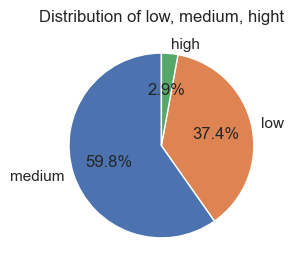

In [159]:
label_counts = white_red_df.quality_label.value_counts()
plt.figure(figsize= (3,3))
sns.set(style = 'whitegrid')
plt.pie(label_counts, labels = label_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of low, medium, hight')
plt.show()

In [160]:
'''lets encode the wine colour data'''
encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform= 'pandas')

colour_encoded_data = encoder.fit_transform(white_red_copy[['wine_type']])
if 'wine_type' in white_red_copy.columns:
    ml_df = pd.concat([white_red_copy, colour_encoded_data], axis= 1)
#print(white_red_copy.columns)
#ml_df = white_red_copy[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       #'pH', 'sulphates', 'alcohol', 'quality','wine_type_red']]
if 'wine_type' in ml_df.columns:
    ml_df.drop(val, axis=1, inplace= True)
    ml_df.drop('wine_type_red', axis = 1, inplace = True)
    #ml_df.drop(['quality', 'quality_label', 'colour'], axis=1, inplace= True)
display (ml_df.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour,quality_label,wine_type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium,1.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,medium,1.0


In [161]:
''' lets use label encoder to encode the wine_quality
we cannot use onehot encoder as that only does binary, dichotomous choices
low 1
medium 2
high 0
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ml_df['quality_label_encoded'] = le.fit_transform(ml_df['quality_label'])
print(ml_df.head())



   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality colour quality_label  wine_type_white  quality_label_encoded
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6  white        medium              1.0                      2
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6  white        medium              1.0                      2
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6  white        medium              1.0                      2
3            7.2              0.23         0.32             8.5      0.058                 47.0             

In [162]:
''' drop other unwanted columns: quality_label, colour, quality'''
for val in ['quality_label', 'colour', 'quality', 'wine_type']:
    if val in ml_df.columns:
        ml_df.drop(val, axis =1, inplace= True)
display(ml_df.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type_white,quality_label_encoded
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1.0,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1.0,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1.0,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1.0,2
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1.0,2


In [163]:
''' split the data'''
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)
display(X_train.shape)
display(x_test.shape)
display(Y_train.shape)
display(y_test.shape)


(4256, 12)

(1064, 12)

(4256, 1)

(1064, 1)

In [164]:
def log_regress(X_train, Y_train, x_test, y_test, graph):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    lr = LogisticRegression(random_state = 42, max_iter = 10000, multi_class= 'multinomial')
    lr.fit(X_train, Y_train)
    pred_lr = lr.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_lr)
    accuracy_percentage = round(accuracy_score(y_test, pred_lr) * 100,2)
    #print("Accuracy of Logistic Regression:", accuracy_percentage, "%")
    
#printing a graph of the heatmap
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Logistic Regression Confusion Map')        
        plt.show()
    #rint('________________')
    return accuracy_percentage


In [165]:
'''neighbours classifier''' 
def neigh_class(X_train, Y_train, x_test, y_test, graph):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    accuracy_percentage = (knn.score(x_test, y_test) * 100).round(2)
    #print("Accuracy of Neighbours Classifier:", accuracy_percentage, "%")
    pred_neighbours = knn.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_neighbours)    
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Random Forest Confusion Map')
        plt.show()
    #print('________________')
    return accuracy_percentage



In [166]:
'''decision tree'''
def dec_tree(X_train, Y_train, x_test, y_test, graph):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    accuracy_percentage = (tree.score(x_test, y_test) * 100).round(2)
    #print("Accuracy of Decision Tree:", accuracy_percentage, "%")
    pred_tree = tree.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_tree)
    plt.show()
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Decision Tree Confusion Map')
        plt.show()
    
    #print('________________')
    return accuracy_percentage



In [167]:
'''random forest'''
def ran_forest(X_train, Y_train, x_test, y_test, graph) :
    from sklearn.ensemble import RandomForestClassifier
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
    forest.fit(X_train, Y_train)
    accuracy_percentage = (forest.score(x_test, y_test) * 100).round(2)
    pred_forest = forest.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_forest)
    
    #print("Accuracy of Random Forest:", accuracy_percentage, "%")    
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Random Forest Confusion Map')
        plt.show()
    #print('________________')
    return accuracy_percentage



In [168]:
'''Linear regression'''
def lin_reg(X_train, Y_train, x_test, y_test):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn import linear_model
    linreg = linear_model.LinearRegression()
    linreg.fit(X_train, Y_train)
    accuracy_percentage = (linreg.score(x_test, y_test) * 100).round(2)
    pred_linreg = linreg.predict(x_test)

    #print("Accuracy of Linear Regression:", accuracy_percentage, "%")
    #print('________________')
    return accuracy_percentage




In [169]:
index_names = ['Logistic Regression', 'Linear Regression', 'Neighbours Classifier', 'Decision Tree', 'Random Forest']
comparison_df = pd.DataFrame(index=index_names)
#ml_df = ml_df.drop(['quality'], axis = 1)X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['all_variables'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

,all_variables
Logistic Regression,71.15
Linear Regression,11.04
Neighbours Classifier,62.22
Decision Tree,65.13
Random Forest,71.43


In [185]:
''' create a correlation matrix between quality_label and the other variables
then save it as a sorted list where the names are in order
sorted list of 

'''
corr = ml_df.corr()
corr_list = corr['quality_label_encoded'][:-1]

corr_list = corr_list.apply(lambda x: abs(x))
corr_list = corr_list.sort_values()
corr_list_names = corr_list.index


pH                      0.020552
free_sulfur_dioxide     0.023017
fixed_acidity           0.033533
residual_sugar          0.035080
total_sulfur_dioxide    0.039732
sulphates               0.042461
citric_acid             0.059817
wine_type_white         0.068925
chlorides               0.117304
density                 0.166917
volatile_acidity        0.211626
alcohol                 0.243506
Name: quality_label_encoded, dtype: float64

Index(['pH', 'free_sulfur_dioxide', 'fixed_acidity', 'residual_sugar', 'total_sulfur_dioxide', 'sulphates', 'citric_acid', 'wine_type_white', 'chlorides', 'density', 'volatile_acidity', 'alcohol'], dtype='object')


Index(['pH', 'free_sulfur_dioxide', 'fixed_acidity', 'residual_sugar', 'total_sulfur_dioxide', 'sulphates', 'citric_acid', 'wine_type_white', 'chlorides', 'density', 'volatile_acidity', 'alcohol'], dtype='object')

In [187]:
'''create my DF showing the results of my algorithms. WE will start with all columsn'''
comparison_df = pd.DataFrame(index=index_names)
comparison_df['all'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)
f
or val in corr_list_names:
    pass


,all
Logistic Regression,71.15
Linear Regression,11.04
Neighbours Classifier,62.22
Decision Tree,65.13
Random Forest,71.43


In [ ]:
''' using a for loop we will remove one column at a time based on the columns correlation with our target depenedent variable
using our '''